**NAME :** kalluri.rishitha


 > **PROJECT** : sms spam classification


steps invovled to do this project
Data Collection
> Collect the dataset or Create the dataset

>Data Preprocessing.


  
    o	Import the Libraries.
    o	Import the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o    Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.
•	Model Building
    
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

# Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset

In [ ]:
dataset = pd.read_csv("spam.csv",encoding='ISO-8859-1', sep = ',')

In [ ]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
dataset = dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis =1)

In [ ]:
dataset.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
dataset.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# Replace ham with 0 and spam with 1
dataset = dataset.replace(['ham','spam'],[0, 1])

In [ ]:
dataset

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Data visuialization

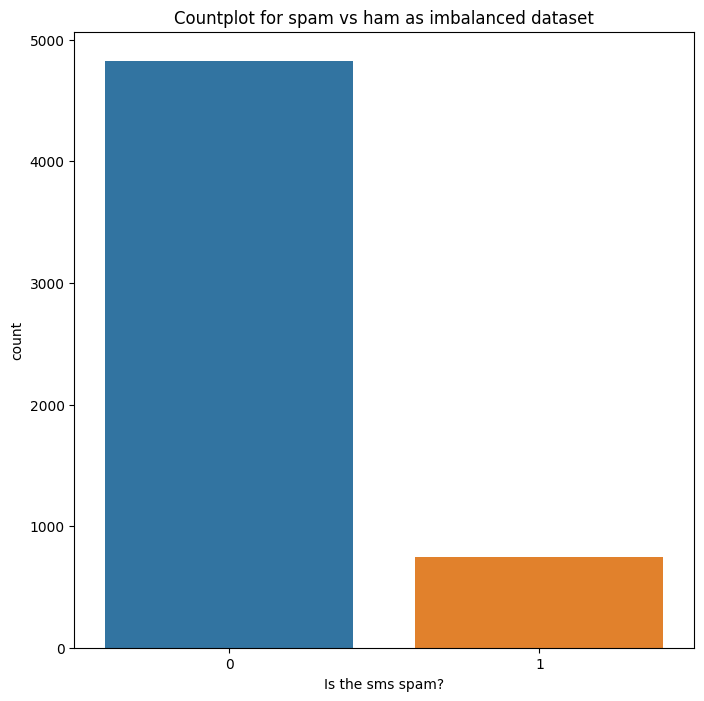

In [ ]:
#count plot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g= sns.countplot(x="v1", data = dataset)
p = plt.title('Countplot for spam vs ham as imbalanced dataset')
p = plt.xlabel("Is the sms spam?")

In [ ]:
#handling imbalanced dataset using Oversampling
only_spam =  dataset[dataset["v1"]==1]

In [ ]:
only_spam

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
print("No.of Spam Sms:",len(dataset))
print("No.of ham Sms:",len(dataset) -len(only_spam))

No.of Spam Sms: 5572
No.of ham Sms: 4825


In [ ]:

count = int((dataset.shape[0]- only_spam.shape[0])/only_spam.shape[0])

In [ ]:
count

6

In [ ]:
for i in range(0,count-1):
    dataset = pd.concat([dataset,only_spam])

dataset.shape

(9307, 2)

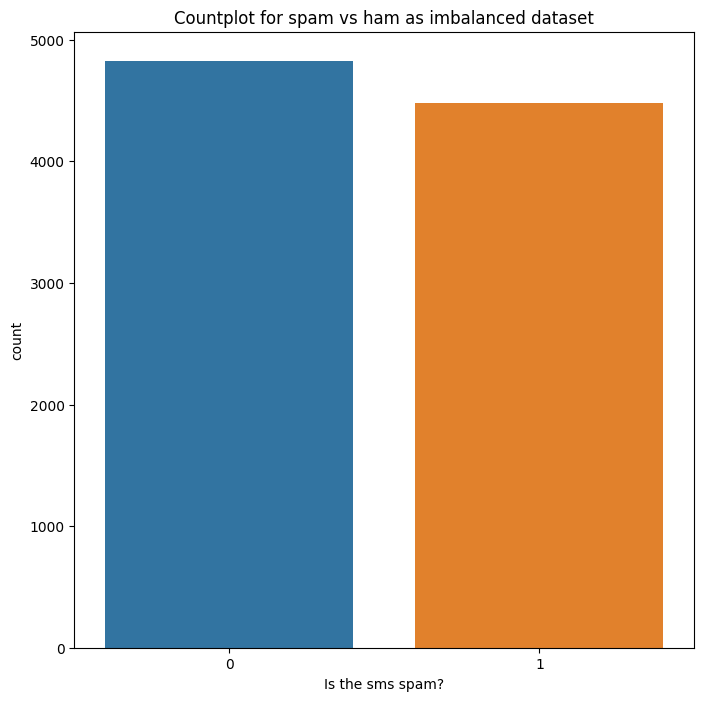

In [ ]:
#count plot for spam vs ham as balanced dataset
plt.figure(figsize=(8,8))
g= sns.countplot(x="v1", data = dataset)
p = plt.title('Countplot for spam vs ham as imbalanced dataset')
p = plt.xlabel("Is the sms spam?")
p=plt.ylabel('count')

In [ ]:

#Creating new feature word_count
dataset['word_count']= dataset['v2'].apply(lambda x: len(x.split()))

In [ ]:
dataset

,v1,v2,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


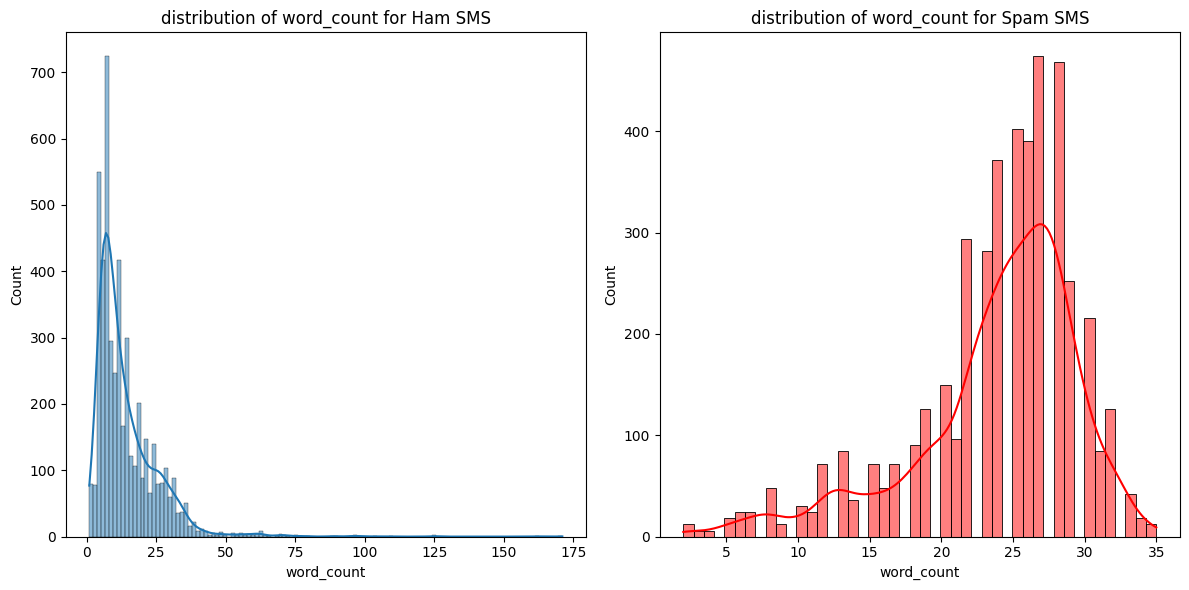

In [ ]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["v1"]==0].word_count,kde = True)
p=plt.title('distribution of word_count for Ham SMS')

#(1,2)
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["v1"]==1].word_count, color = "red",kde = True)
p=plt.title('distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [ ]:
#creating new feature of containing currency symbols
def currency(data):
    currency_symbols = ['€','$','¥','₹','£']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [ ]:
dataset["contains_currency_symbols"]= dataset["v2"].apply(currency)

In [ ]:
dataset

,v1,v2,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


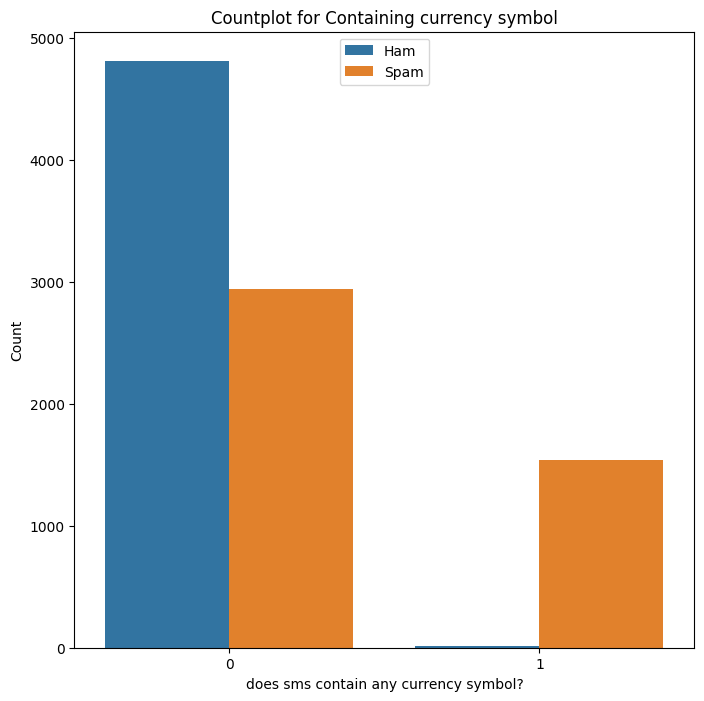

In [ ]:
#count plot for contain_currency_symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data = dataset, hue = "v1")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('does sms contain any currency symbol?')
p = plt.ylabel('Count')
p=plt.legend(labels = ["Ham", "Spam"],loc= 9)

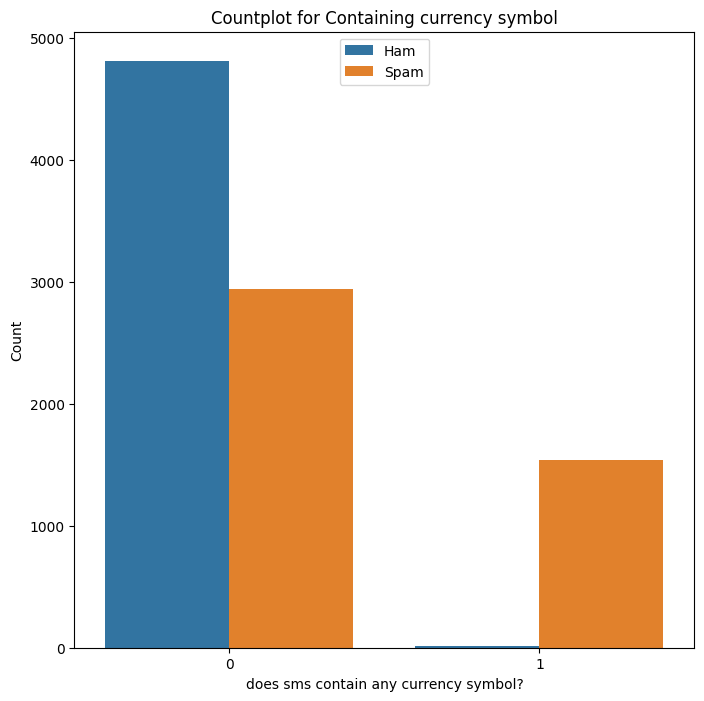

In [ ]:
#count plot for contain_currency_symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data = dataset, hue = "v1")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('does sms contain any currency symbol?')
p = plt.ylabel('Count')
p=plt.legend(labels = ["Ham", "Spam"],loc= 9)

In [ ]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [ ]:
dataset["contains_number"] = dataset['v2'].apply(number)

In [ ]:
dataset

,v1,v2,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


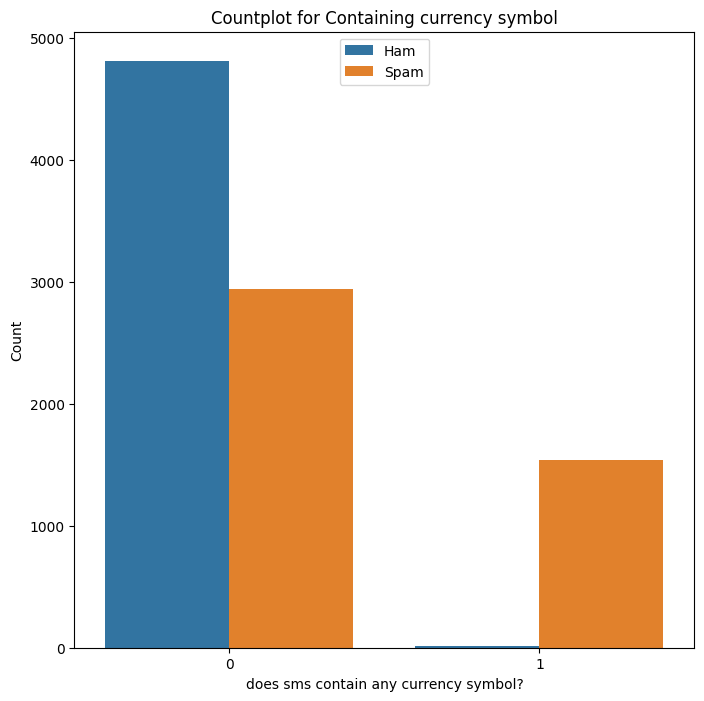

In [ ]:
#countplot for containing numbers
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data = dataset, hue = "v1")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('does sms contain any currency symbol?')
p = plt.ylabel('Count')
p=plt.legend(labels = ["Ham", "Spam"],loc= 9)

# Data cleaning

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.v2):
    v2 = re.sub(pattern='[^a-zA-Z]',repl =' ',string=sms) #filtering out special characters and numbers
    v2 = v2.lower()
    words = v2.split()#Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    v2 = ' '.join(lemm_words)

    corpus.append(v2)

In [ ]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# feature scaling and spliting data into training and testing

In [ ]:

#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [ ]:
X=pd.DataFrame(vectors,columns = feature_names)
y=dataset['v1']

In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [ ]:
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,0.0,0.0,0.303755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model building using navie bayes model

In [ ]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb,X,y,scoring ='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.944
0.004


In [ ]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [ ]:
cn = confusion_matrix(y_test,y_pred)
cn

array([[908,  50],
       [ 57, 847]])

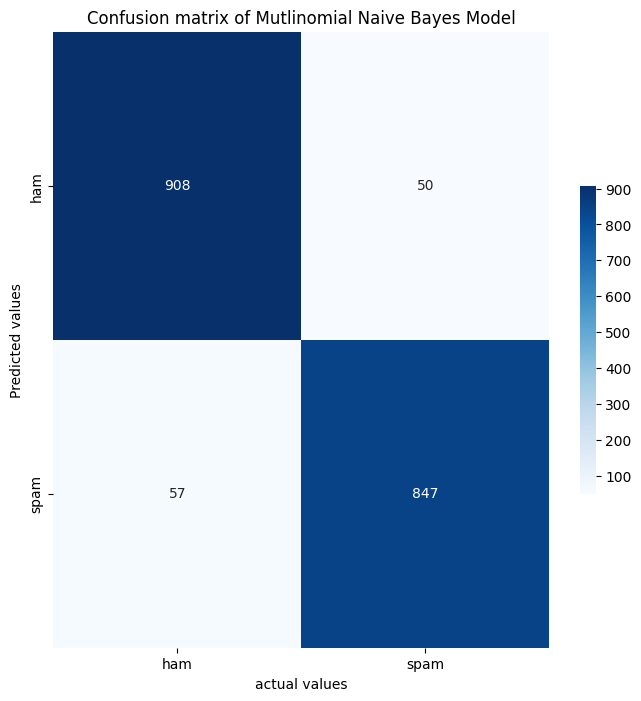

In [ ]:
plt.figure(figsize=(8,8))
axis_labels =['ham','spam']
g = sns.heatmap(data=cn,xticklabels= axis_labels,yticklabels =axis_labels,annot =True,fmt = 'g',cbar_kws={"shrink":0.5},cmap = "Blues")
p=plt.title("Confusion matrix of Mutlinomial Naive Bayes Model")
p = plt.xlabel('actual values')
p = plt.ylabel('Predicted values')

# Model building using Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
cv1 = cross_val_score(dt,X,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))


0.98
0.003


In [ ]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.981203007518797

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [ ]:
cn = confusion_matrix(y_test,y_pred)
cn

array([[926,  32],
       [  3, 901]])

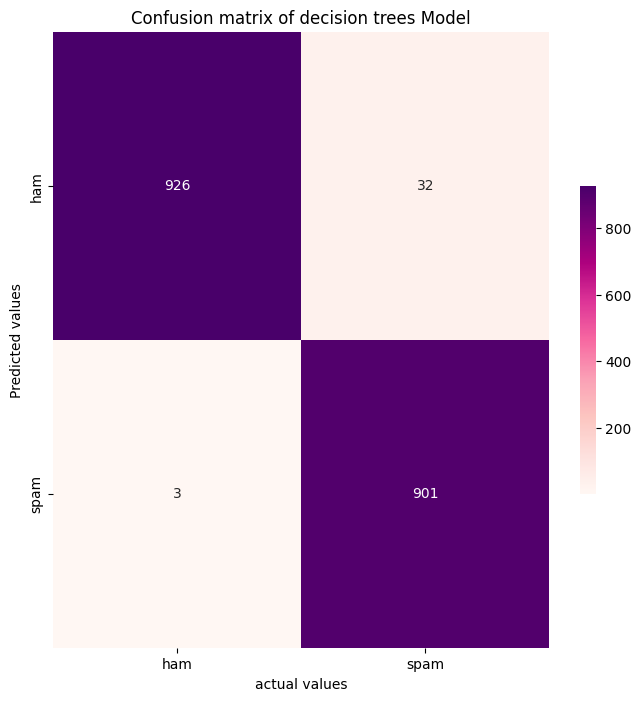

In [ ]:
plt.figure(figsize=(8,8))
axis_labels =['ham','spam']
g = sns.heatmap(data=cn,xticklabels= axis_labels,yticklabels =axis_labels,annot =True,fmt = 'g',cbar_kws={"shrink":0.5},cmap = "RdPu")
p=plt.title("Confusion matrix of decision trees Model")
p = plt.xlabel('actual values')
p = plt.ylabel('Predicted values')

# **Prediction**

In [ ]:
def predict_spam(sms):
    v2 = re.sub(pattern='[^a-zA-Z]',repl =' ',string=sms) #filtering out special characters and numbers
    v2 = v2.lower()
    words = v2.split()#Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    v2 = ' '.join(lemm_words)
    temp = tfidf.transform([v2]).toarray()
    return dt.predict(temp)

In [ ]:
#prediction 1 : lottery text message
sample_message = "Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery"

if predict_spam(sample_message):
    print("Got it! This is a SPAM Message")
else:
    print("This is a HAM(normal) Message.")

Got it! This is a SPAM Message


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


After performing suitable machine learning algorithms we conclude that
decision tree  algorithm gives better accuracy than navie bayes model  and aslo having confusion matrix of  high TP and TN rates, low FP and FN rates.

In [ ]:
#final accuracy
accuracy_score(y_test,y_pred)

0.981203007518797

In [ ]:
#final classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

